In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
import time
from datetime import datetime
from pytz import timezone
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlibe inline 
%matplotlibe notebook

UsageError: Line magic function `%matplotlibe` not found.


In [2]:
df = pd.read_csv("Forecast.csv",parse_dates=True)

In [3]:
df.tail()

,product,date,city,sales
4795,SECF,11-01-2017,Delhi,5837
4796,SECF,12-01-2017,Delhi,7451
4797,SECF,01-01-2018,Delhi,7712
4798,SECF,02-01-2018,Delhi,31525
4799,SECF,03-01-2018,Delhi,36136


In [4]:
df['Date'] = pd.to_datetime(df['date'])

In [5]:
#df = df[df.Date < pd.to_datetime('2018-01-01')]

In [6]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [7]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [8]:
df.head()

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01


In [9]:
df.head(50)

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01
5,Mixers,09-01-2014,Mumbai,4677008,2014-09-01
6,Mixers,10-01-2014,Mumbai,4331662,2014-10-01
7,Mixers,11-01-2014,Mumbai,2184730,2014-11-01
8,Mixers,12-01-2014,Mumbai,4131878,2014-12-01
9,Mixers,01-01-2015,Mumbai,4043952,2015-01-01


In [38]:
df.set_index('Date',inplace=True)
df.head()

,product,date,city,sales
Date,,,,
2014-04-01,Mixers,04-01-2014,Mumbai,2679347
2014-05-01,Mixers,05-01-2014,Mumbai,3864612
2014-06-01,Mixers,06-01-2014,Mumbai,2932658
2014-07-01,Mixers,07-01-2014,Mumbai,3703713
2014-08-01,Mixers,08-01-2014,Mumbai,3931029


In [10]:
df.describe()

,sales
count,4.800000e+03
mean,7.415188e+05
std,1.308447e+06
min,0.000000e+00
25%,1.171152e+05
50%,3.077215e+05
75%,7.796660e+05
max,1.588133e+07


In [39]:
df.tail()

,product,date,city,sales
Date,,,,
2017-11-01,SECF,11-01-2017,Delhi,5837
2017-12-01,SECF,12-01-2017,Delhi,7451
2018-01-01,SECF,01-01-2018,Delhi,7712
2018-02-01,SECF,02-01-2018,Delhi,31525
2018-03-01,SECF,03-01-2018,Delhi,36136


In [40]:
Che_Coo1= df[(df['city'] == 'Chennai') & (df['product'] == 'coolers')]

In [41]:
Che_Coo1.tail()

,product,date,city,sales
Date,,,,
2017-11-01,coolers,11-01-2017,Chennai,99467
2017-12-01,coolers,12-01-2017,Chennai,91823
2018-01-01,coolers,01-01-2018,Chennai,1945961
2018-02-01,coolers,02-01-2018,Chennai,10642921
2018-03-01,coolers,03-01-2018,Chennai,15881328


In [42]:
Che_Coo1.shape

(48, 4)

In [43]:
Che_Coo= Che_Coo1.drop('date', axis = 1)

In [44]:
Che_Coo.head()

,product,city,sales
Date,,,
2014-04-01,coolers,Chennai,9404582
2014-05-01,coolers,Chennai,2966694
2014-06-01,coolers,Chennai,86222
2014-07-01,coolers,Chennai,0
2014-08-01,coolers,Chennai,0


In [45]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

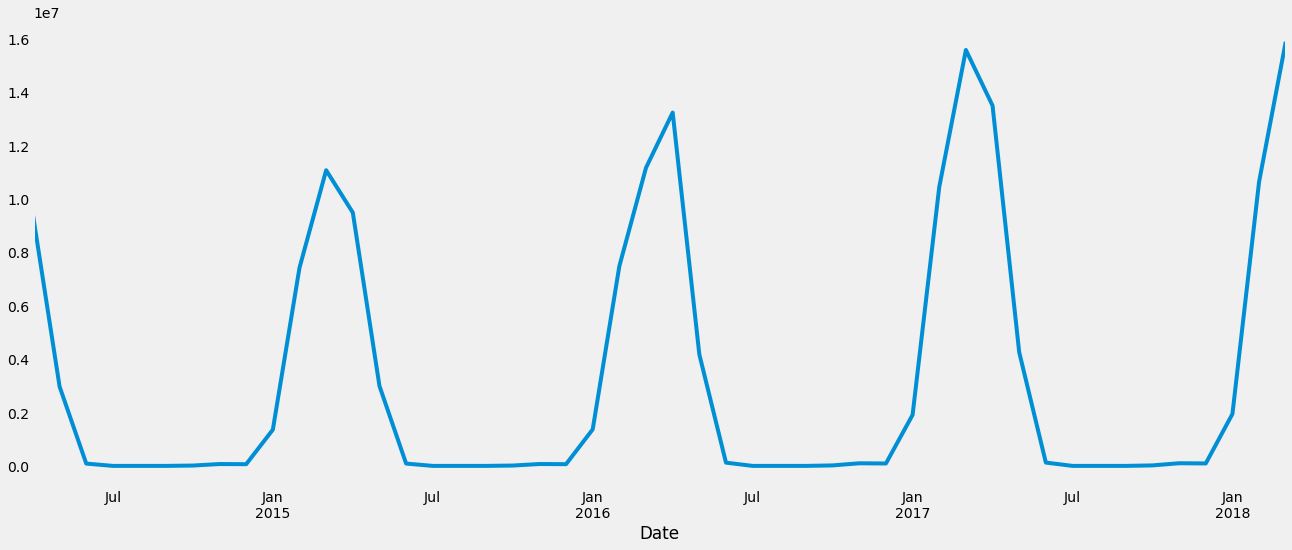

In [46]:
Che_Coo['sales'].plot()
plt.grid();

In [47]:
Che_Coo.sort_index(inplace= True)

In [48]:
Che_Coo.head()

,product,city,sales
Date,,,
2014-04-01,coolers,Chennai,9404582
2014-05-01,coolers,Chennai,2966694
2014-06-01,coolers,Chennai,86222
2014-07-01,coolers,Chennai,0
2014-08-01,coolers,Chennai,0


In [49]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

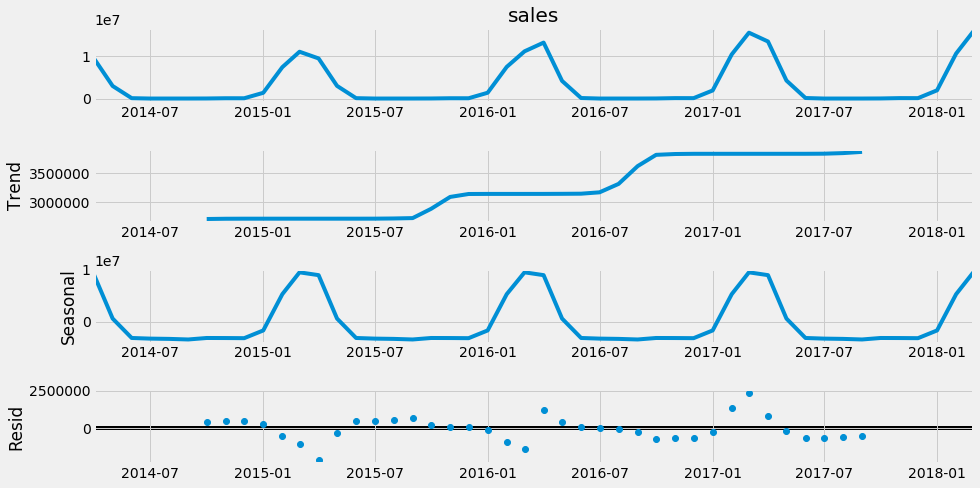

In [50]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(Che_Coo['sales'],model='additive')
decomposition.plot();

In [51]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    2.707501e+06
2014-11-01    2.711887e+06
2014-12-01    2.712969e+06
2015-01-01    2.713000e+06
2015-02-01    2.713000e+06
2015-03-01    2.713000e+06
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    8.851085e+06
2014-05-01    5.889960e+05
2014-06-01   -3.108252e+06
2014-07-01   -3.227472e+06
2014-08-01   -3.280433e+06
2014-09-01   -3.392022e+06
2014-10-01   -3.109381e+06
2014-11-01   -3.119640e+06
2014-12-01   -3.144131e+06
2015-01-01   -1.673216e+06
2015-02-01    5.228646e+06
2015-03-01    9.385819e+06
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    4.146456e+05
2014-11-01    4.770910e+05
2014-12-01    4.951708e+0

In [52]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    2.707501e+06
2014-11-01    2.711887e+06
2014-12-01    2.712969e+06
2015-01-01    2.713000e+06
2015-02-01    2.713000e+06
2015-03-01    2.713000e+06
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    8.851085e+06
2014-05-01    5.889960e+05
2014-06-01   -3.108252e+06
2014-07-01   -3.227472e+06
2014-08-01   -3.280433e+06
2014-09-01   -3.392022e+06
2014-10-01   -3.109381e+06
2014-11-01   -3.119640e+06
2014-12-01   -3.144131e+06
2015-01-01   -1.673216e+06
2015-02-01    5.228646e+06
2015-03-01    9.385819e+06
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    4.146456e+05
2014-11-01    4.770910e+05
2014-12-01    4.951708e+0

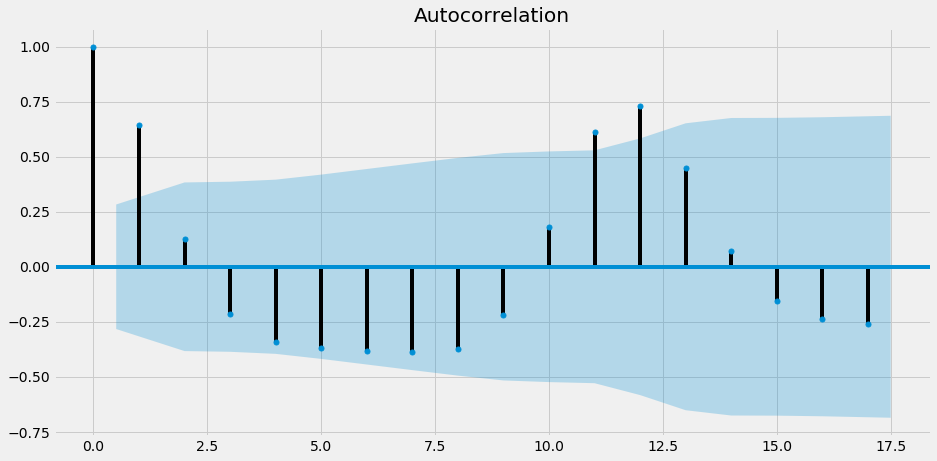

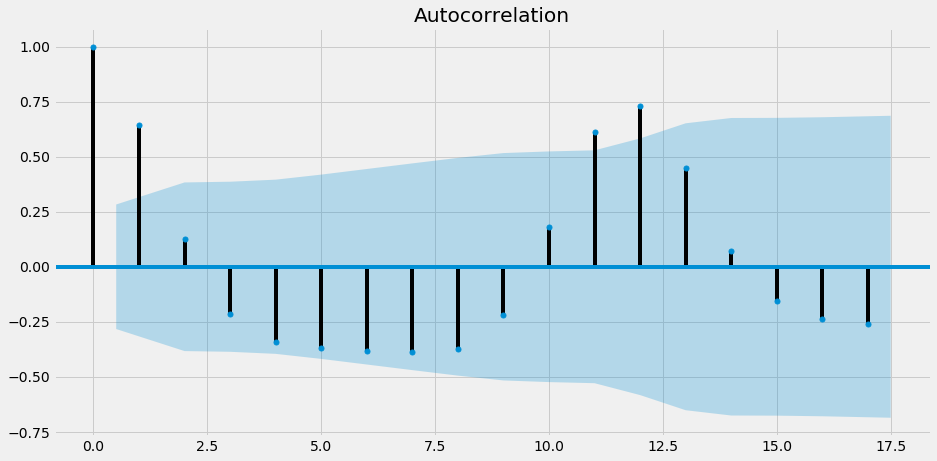

In [53]:
plot_acf(Che_Coo['sales'])

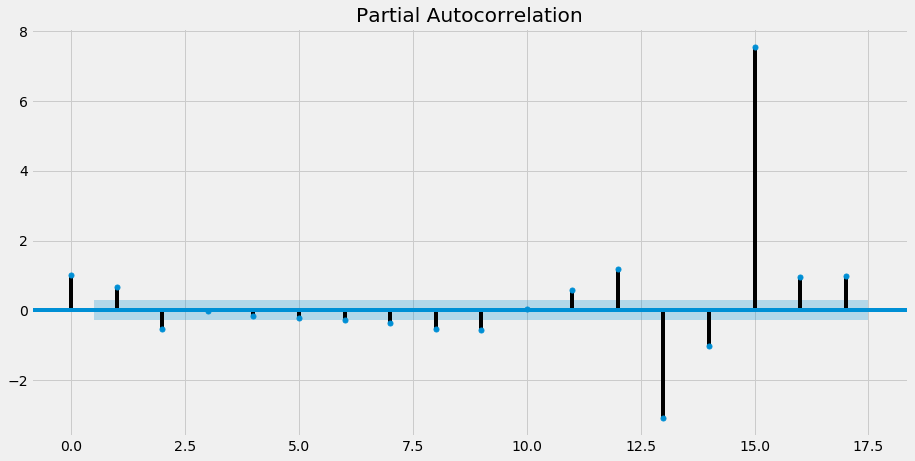

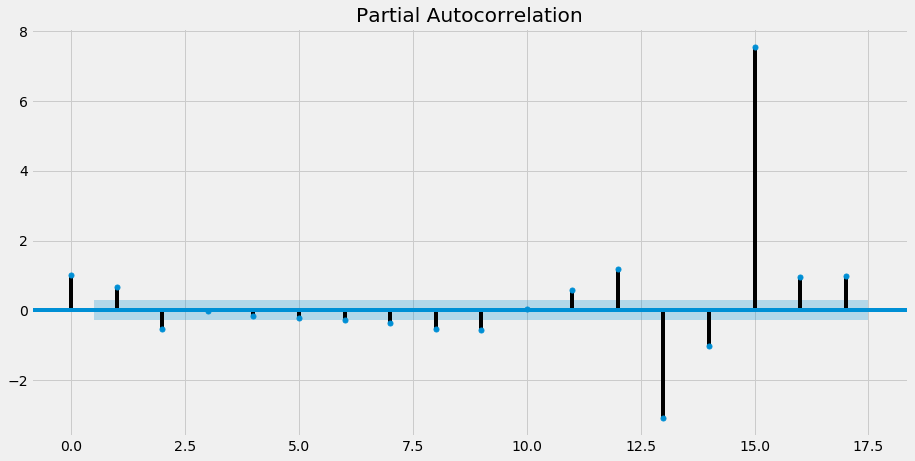

In [54]:
plot_pacf(Che_Coo['sales'])

In [55]:
Che_Coo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-04-01 to 2018-03-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  48 non-null     object
 1   city     48 non-null     object
 2   sales    48 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [56]:
train    =   Che_Coo[0:int(len(Che_Coo)*0.7)] 
test     =  Che_Coo[int(len(Che_Coo)*0.7):]

In [57]:
train.shape

(33, 3)

In [58]:
test.shape

(15, 3)

In [59]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,product,city,sales
Date,,,
2014-04-01,coolers,Chennai,9404582
2014-05-01,coolers,Chennai,2966694
2014-06-01,coolers,Chennai,86222
2014-07-01,coolers,Chennai,0
2014-08-01,coolers,Chennai,0


Last few rows of Training Data


,product,city,sales
Date,,,
2016-08-01,coolers,Chennai,0
2016-09-01,coolers,Chennai,0
2016-10-01,coolers,Chennai,17959
2016-11-01,coolers,Chennai,97544
2016-12-01,coolers,Chennai,90047


First few rows of Test Data


,product,city,sales
Date,,,
2017-01-01,coolers,Chennai,1908340
2017-02-01,coolers,Chennai,10437161
2017-03-01,coolers,Chennai,15574294
2017-04-01,coolers,Chennai,13491138
2017-05-01,coolers,Chennai,4255806


Last few rows of Test Data


,product,city,sales
Date,,,
2017-11-01,coolers,Chennai,99467
2017-12-01,coolers,Chennai,91823
2018-01-01,coolers,Chennai,1945961
2018-02-01,coolers,Chennai,10642921
2018-03-01,coolers,Chennai,15881328


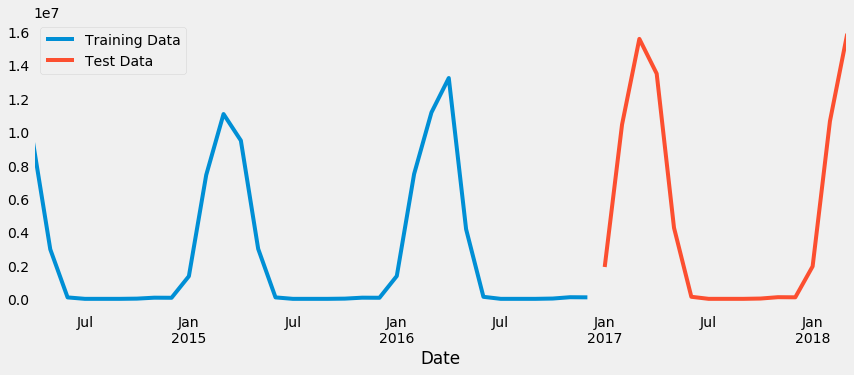

In [60]:
train['sales'].plot(figsize=(13,5), fontsize=14)
test['sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [61]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [62]:
from sklearn import metrics

Simpleaverage

In [63]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [64]:
SimpleAverage_test['mean_forecast'] = train['sales'].mean()
SimpleAverage_test.head()

,product,city,sales,mean_forecast
Date,,,,
2017-01-01,coolers,Chennai,1908340,2.512327e+06
2017-02-01,coolers,Chennai,10437161,2.512327e+06
2017-03-01,coolers,Chennai,15574294,2.512327e+06
2017-04-01,coolers,Chennai,13491138,2.512327e+06
2017-05-01,coolers,Chennai,4255806,2.512327e+06


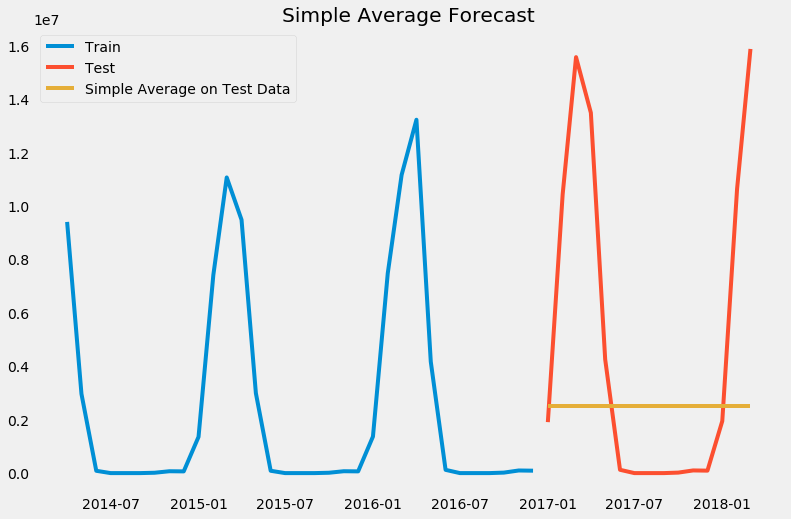

In [65]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['sales'], label='Train')
plt.plot(SimpleAverage_test['sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [66]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 6557723.742


In [67]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average'])
resultsDf

,Test RMSE
Simple Average,6.557724e+06


In [68]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Simple average

In [69]:
SES_train = train.copy()
SES_test = test.copy()

In [70]:
model_SES = SimpleExpSmoothing(SES_train['sales'])

In [71]:
model_SES_autofit = model_SES.fit(optimized=True)

In [72]:
model_SES_autofit.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 9404582.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [73]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,product,city,sales,predict
Date,,,,
2017-01-01,coolers,Chennai,1908340,90082.49313
2017-02-01,coolers,Chennai,10437161,90082.49313
2017-03-01,coolers,Chennai,15574294,90082.49313
2017-04-01,coolers,Chennai,13491138,90082.49313
2017-05-01,coolers,Chennai,4255806,90082.49313


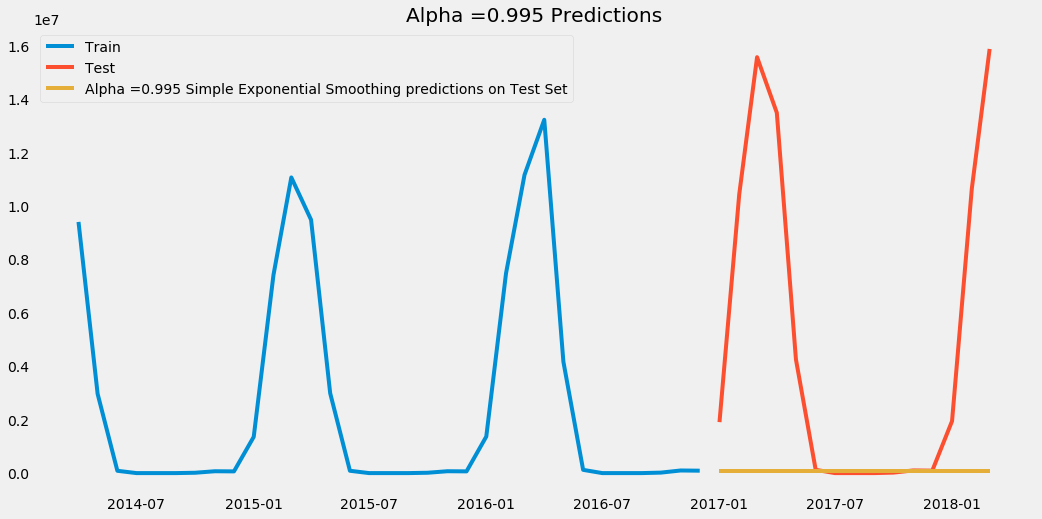

In [74]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [75]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['sales'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 7794319.629


In [76]:
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [77]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict'])
print('\nMAPE:',mape)


MAPE: inf


In [78]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE': [mape] },index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,6.557724e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",7.794320e+06,inf


In [79]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [80]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [81]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,4.990515e+06,6.666789e+06
1,0.2,4.597884e+06,7.142880e+06
2,0.3,4.350207e+06,7.486100e+06
3,0.4,4.119127e+06,7.685867e+06
4,0.5,3.901217e+06,7.769629e+06
5,0.6,3.700544e+06,7.793728e+06
8,0.9,3.200440e+06,7.794382e+06
7,0.8,3.351280e+06,7.795434e+06
6,0.7,3.517641e+06,7.796784e+06


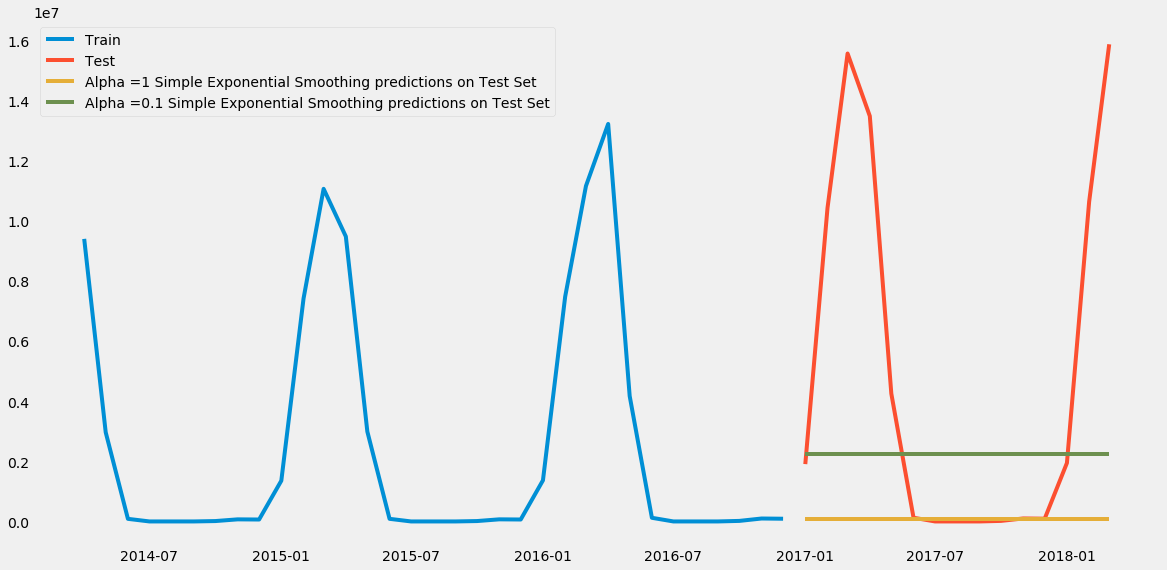

In [82]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [83]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict',0.1])
print('\nMAPE:',mape)


MAPE: inf


In [84]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,6.557724e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",7.794320e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",6.666789e+06,inf


Double

In [85]:
DES_train = train.copy()
DES_test = test.copy()

In [86]:
model_DES = Holt(DES_train['sales'])

In [87]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [88]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend = j, optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [89]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,2.522092e+07,7.397979e+06
1,0.1,0.2,1.813619e+07,1.223561e+07
2,0.1,0.3,1.525162e+07,8.552921e+06
3,0.1,0.4,1.325901e+07,1.916206e+07
4,0.1,0.5,1.192661e+07,2.119041e+07
...,...,...,...,...
95,1.0,0.6,3.436429e+06,7.801270e+06
96,1.0,0.7,3.438882e+06,7.751851e+06
97,1.0,0.8,3.447337e+06,7.761695e+06
98,1.0,0.9,3.465040e+06,7.791657e+06


In [90]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
57,0.6,0.8,4.430819e+06,6.625123e+06
56,0.6,0.7,4.404969e+06,6.638101e+06
55,0.6,0.6,4.393682e+06,6.690364e+06
45,0.5,0.6,4.764084e+06,6.792842e+06
49,0.5,1.0,4.843490e+06,6.807241e+06


In [91]:
mape = mean_absolute_percentage_error(DES_test['sales'],DES_test['predict',0.6,0.8])
print('\nMAPE:',mape)


MAPE: inf


In [92]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.6,Beta=0.8,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,6.557724e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",7.794320e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",6.666789e+06,inf
"Alpha=0.6,Beta=0.8,DoubleExponentialSmoothing",6.625123e+06,inf


In [93]:
TES_train = train.copy()
TES_test = test.copy()

In [94]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['sales'],trend='additive',seasonal='additive',initialization_method='estimated')

In [95]:
model_TES_autofit = model_TES.fit()

In [96]:
model_TES_autofit.params

{'smoothing_level': 0.040357142857142855,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.0001,
 'damping_trend': nan,
 'initial_level': 2710291.1916666655,
 'initial_trend': 384.46515151520725,
 'initial_seasons': array([ 6772261.15625   ,   279569.07291667, -2625458.17708333,
        -2712916.76041667, -2716027.76041667, -2722582.55208333,
        -2694067.80208333, -2641881.51041667, -2648292.76041667,
        -1355815.30208333,  4706776.69791667,  8358435.69791667]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [97]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,product,city,sales,auto_predict
Date,,,,
2017-01-01,coolers,Chennai,1908340,1.515191e+06
2017-02-01,coolers,Chennai,10437161,7.578187e+06
2017-03-01,coolers,Chennai,15574294,1.123025e+07
2017-04-01,coolers,Chennai,13491138,9.644830e+06
2017-05-01,coolers,Chennai,4255806,3.152271e+06


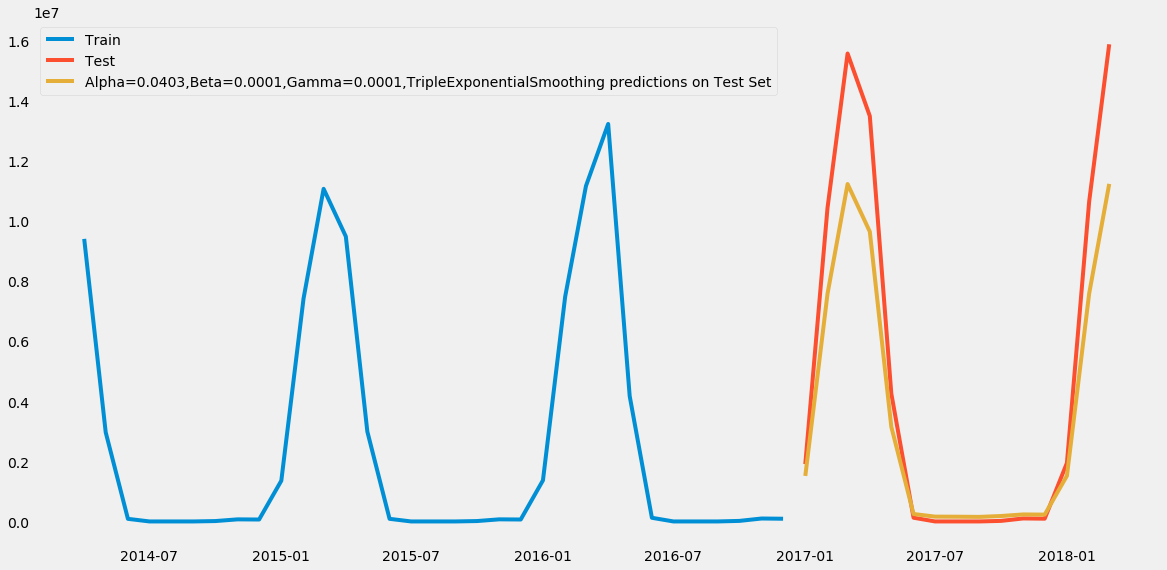

In [98]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['sales'], label='Train')
plt.plot(TES_test['sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.0403,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [99]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['sales'],TES_test['auto_predict'],squared=False)
print("Forlabel='Alpha=0.0403,Beta=0.0001,Gamma=0.0001', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Forlabel='Alpha=0.0403,Beta=0.0001,Gamma=0.0001', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 2228527.786


In [100]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['auto_predict'])
print('\nMAPE:',mape)


MAPE: inf


In [101]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1], 'Test MAPE' : [mape]}
                           ,index=['Alpha=0.0403,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,6.557724e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",7.794320e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",6.666789e+06,inf
"Alpha=0.6,Beta=0.8,DoubleExponentialSmoothing",6.625123e+06,inf
"Alpha=0.0403,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",2.228528e+06,inf


In [102]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [103]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [104]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.1,0.1,7.000101e+05,2.006360e+06
1,0.1,0.1,0.2,7.010210e+05,1.959768e+06
2,0.1,0.1,0.3,7.017294e+05,1.917236e+06
3,0.1,0.1,0.4,7.021355e+05,1.879181e+06
4,0.1,0.1,0.5,7.022391e+05,1.845994e+06
...,...,...,...,...,...
995,1.0,1.0,0.6,1.301797e+06,2.590656e+06
996,1.0,1.0,0.7,1.300621e+06,2.735531e+06
997,1.0,1.0,0.8,1.299615e+06,2.906614e+06
998,1.0,1.0,0.9,1.299363e+06,3.103479e+06


In [105]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
19,0.1,0.2,1.0,716434.949587,1.733336e+06
18,0.1,0.2,0.9,717923.158684,1.736758e+06
17,0.1,0.2,0.8,719099.129251,1.746433e+06
16,0.1,0.2,0.7,719962.248785,1.762305e+06
9,0.1,0.1,1.0,698225.473473,1.763335e+06


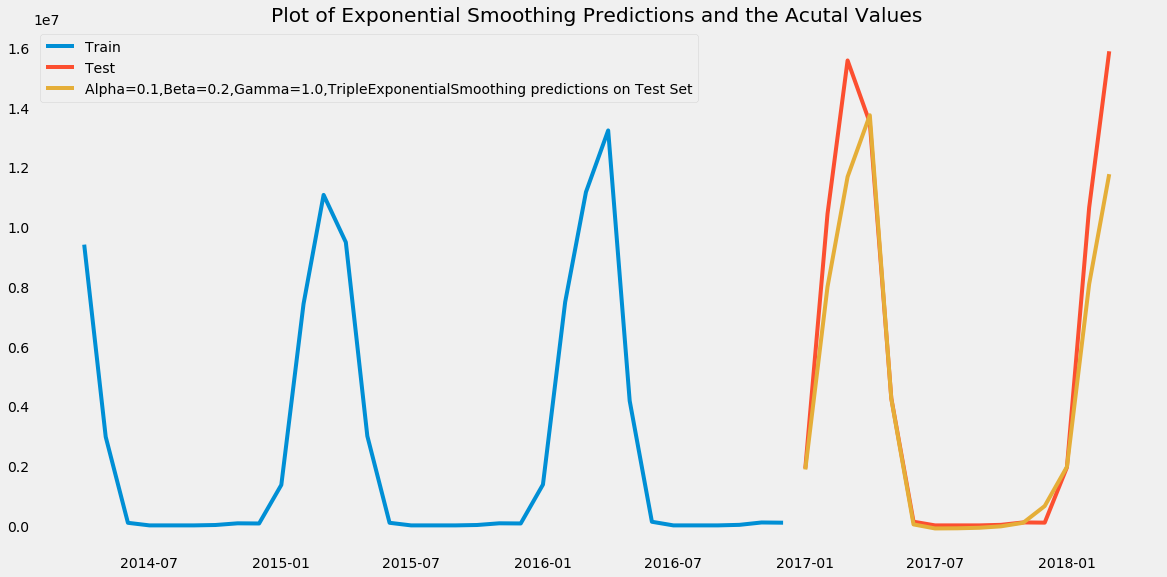

In [106]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')


plt.plot(TES_test['predict', 0.1000000000000000, 0.2000000000000000, 1.0], label='Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [107]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['predict',0.1,0.2,1.0])
print('\nMAPE:',mape)


MAPE: inf


In [108]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
Simple Average,6.557724e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",7.794320e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",6.666789e+06,inf
"Alpha=0.6,Beta=0.8,DoubleExponentialSmoothing",6.625123e+06,inf
"Alpha=0.0403,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",2.228528e+06,inf
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",1.733336e+06,inf


In [109]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE,Test MAPE
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",1.733336e+06,inf
"Alpha=0.0403,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",2.228528e+06,inf
Simple Average,6.557724e+06,NaN
"Alpha=0.6,Beta=0.8,DoubleExponentialSmoothing",6.625123e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",6.666789e+06,inf
"Alpha=0.995,SimpleExponentialSmoothing",7.794320e+06,inf


In [110]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics|
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

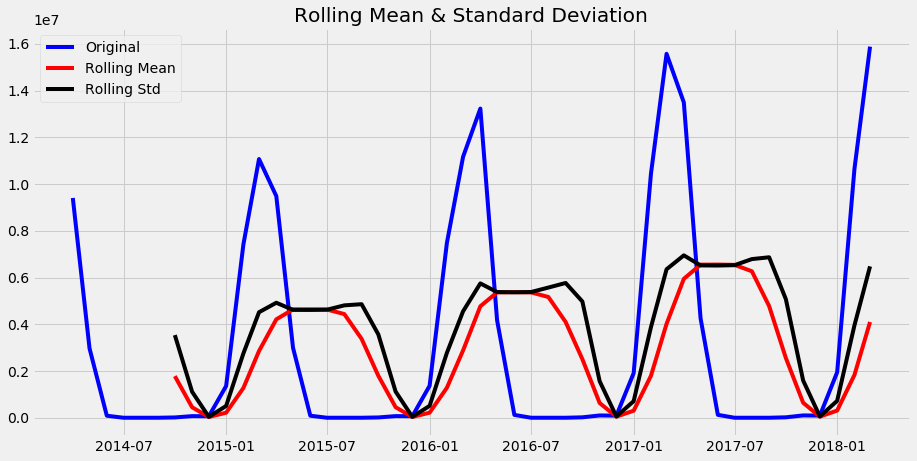

Results of Dickey-Fuller Test:
Test Statistic                 -1.023369
p-value                         0.744646
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64 



In [111]:
test_stationarity(Che_Coo['sales'])

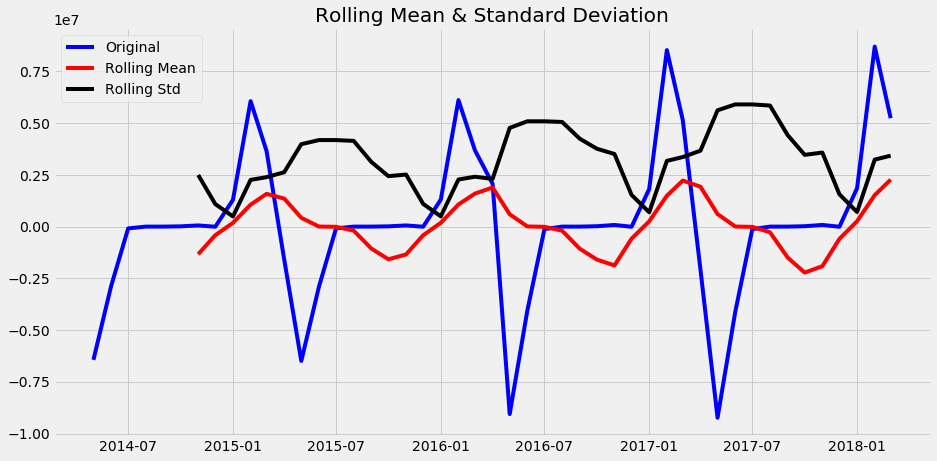

Results of Dickey-Fuller Test:
Test Statistic                -9.542831e+00
p-value                        2.697870e-16
#Lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64 



In [112]:
test_stationarity(Che_Coo['sales'].diff().dropna())

In [113]:
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [114]:
test.dropna(inplace=True)

In [115]:
test = test.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [116]:
from statsmodels.tsa.stattools import adfuller

In [117]:
dftest = adfuller(Che_Coo['sales'],regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -5.697
DF test p-value is 9.27671722133612e-06
Number of lags used 9


In [118]:
dftest = adfuller(train['sales'],regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -4.896
DF test p-value is 0.0003172426490993805
Number of lags used 10


In [119]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools

p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [120]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [121]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1049.688141408531
ARIMA(0, 1, 1) - AIC:1050.1897581989874
ARIMA(0, 1, 2) - AIC:1049.9788297977473
ARIMA(0, 1, 3) - AIC:1044.584889070913
ARIMA(1, 1, 0) - AIC:1051.9874800461043
ARIMA(1, 1, 1) - AIC:1052.0455550683523
ARIMA(1, 1, 2) - AIC:1046.4790616050159
ARIMA(1, 1, 3) - AIC:1046.973686403203
ARIMA(2, 1, 0) - AIC:1051.1130182993008
ARIMA(2, 1, 1) - AIC:1044.1886681181559
ARIMA(2, 1, 2) - AIC:1046.2811449918172
ARIMA(2, 1, 3) - AIC:1048.7702625096595
ARIMA(3, 1, 0) - AIC:1051.069416810988
ARIMA(3, 1, 1) - AIC:1046.1805959540593
ARIMA(3, 1, 2) - AIC:1047.504866687552
ARIMA(3, 1, 3) - AIC:1049.7080611655301


In [122]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
9,"(2, 1, 1)",1044.188668
3,"(0, 1, 3)",1044.584889
13,"(3, 1, 1)",1046.180596
10,"(2, 1, 2)",1046.281145
6,"(1, 1, 2)",1046.479062


In [123]:
auto_ARIMA = ARIMA(train['sales'], order=(2,1,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   33
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -518.094
Date:                Sun, 22 Aug 2021   AIC                           1044.189
Time:                        14:56:17   BIC                           1050.052
Sample:                    04-01-2014   HQIC                          1046.132
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9389      0.106      8.860      0.000       0.731       1.147
ar.L2         -0.3967      0.142     -2.790      0.005      -0.675      -0.118
ma.L1         -0.9997      0.195     -5.134      0.0

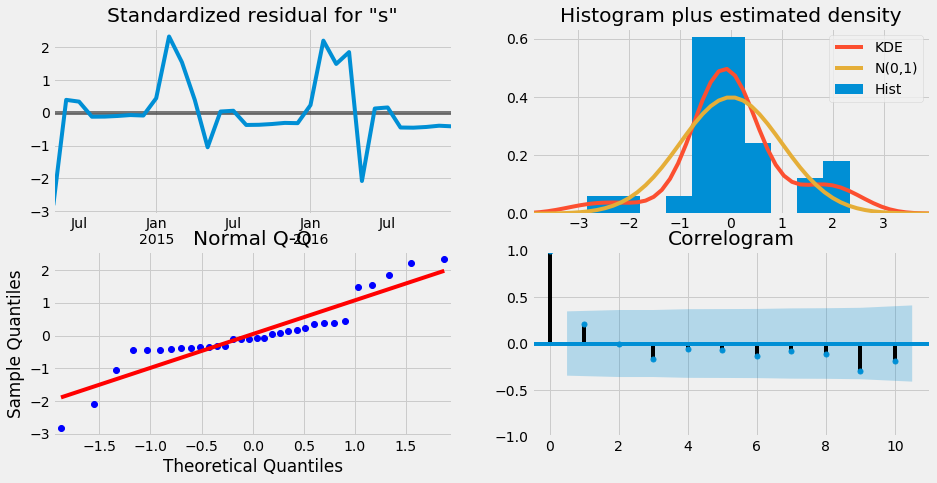

In [124]:
results_auto_ARIMA.plot_diagnostics();

In [125]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [126]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [127]:
rmse = mean_squared_error(test['sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 6652067.63345453 
MAPE: inf


In [128]:
resultsDf_8_4 = pd.DataFrame({'Test RMSE': [resultsDf_8_3.sort_values(by=['Test RMSE']).values[0][1]],'Test MAPE':[mape]}
                           ,index=['ARIMA(2,1,1)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_4])
resultsDf

,Test RMSE,Test MAPE
Simple Average,6.557724e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",7.794320e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",6.666789e+06,inf
"Alpha=0.6,Beta=0.8,DoubleExponentialSmoothing",6.625123e+06,inf
"Alpha=0.0403,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",2.228528e+06,inf
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",1.733336e+06,inf
"ARIMA(2,1,1)",inf,inf


In [129]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 1, 1, 6)
Model: (0, 1, 2)(0, 1, 2, 6)
Model: (0, 1, 3)(0, 1, 3, 6)
Model: (1, 1, 0)(1, 1, 0, 6)
Model: (1, 1, 1)(1, 1, 1, 6)
Model: (1, 1, 2)(1, 1, 2, 6)
Model: (1, 1, 3)(1, 1, 3, 6)
Model: (2, 1, 0)(2, 1, 0, 6)
Model: (2, 1, 1)(2, 1, 1, 6)
Model: (2, 1, 2)(2, 1, 2, 6)
Model: (2, 1, 3)(2, 1, 3, 6)
Model: (3, 1, 0)(3, 1, 0, 6)
Model: (3, 1, 1)(3, 1, 1, 6)
Model: (3, 1, 2)(3, 1, 2, 6)
Model: (3, 1, 3)(3, 1, 3, 6)


In [130]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [131]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}6 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 1, 0, 6)6 - AIC:840.78074373111
SARIMA(0, 1, 0)x(0, 1, 1, 6)6 - AIC:631.5890455210139
SARIMA(0, 1, 0)x(0, 1, 2, 6)6 - AIC:431.4355628032386
SARIMA(0, 1, 0)x(0, 1, 3, 6)6 - AIC:235.362119993987
SARIMA(0, 1, 0)x(1, 1, 0, 6)6 - AIC:614.0350981067098
SARIMA(0, 1, 0)x(1, 1, 1, 6)6 - AIC:606.3001436470972
SARIMA(0, 1, 0)x(1, 1, 2, 6)6 - AIC:430.54677549968613
SARIMA(0, 1, 0)x(1, 1, 3, 6)6 - AIC:237.1589833637395
SARIMA(0, 1, 0)x(2, 1, 0, 6)6 - AIC:437.7989471369777
SARIMA(0, 1, 0)x(2, 1, 1, 6)6 - AIC:436.330191071202
SARIMA(0, 1, 0)x(2, 1, 2, 6)6 - AIC:432.3849089016857
SARIMA(0, 1, 0)x(2, 1, 3, 6)6 - AIC:239.15897481069794
SARIMA(0, 1, 0)x(3, 1, 0, 6)6 - AIC:86.08039250433805
SARIMA(0, 1, 0)x(3, 1, 1, 6)6 - AIC:88.10300016396867
SARIMA(0, 1, 0)x(3, 1, 2, 6)6 - AIC:271.89115910488033
SARIMA(0, 1, 0)x(3, 1, 3, 6)6 - AIC:241.15897507277208
SARIMA(0, 1, 1)x(0, 1, 0, 6)6 - AIC:802.5686939288053
SARIMA(0, 1, 1)x(0, 1, 1, 6)6 - AIC:594.6972537043398
SARIMA(0, 1, 1)x(0, 1, 2, 6)

SARIMA(2, 1, 1)x(1, 1, 3, 6)6 - AIC:209.61698232990256
SARIMA(2, 1, 1)x(2, 1, 0, 6)6 - AIC:399.8750218485837
SARIMA(2, 1, 1)x(2, 1, 1, 6)6 - AIC:401.65418084856793
SARIMA(2, 1, 1)x(2, 1, 2, 6)6 - AIC:403.24176550145086
SARIMA(2, 1, 1)x(2, 1, 3, 6)6 - AIC:211.61697622949643
SARIMA(2, 1, 1)x(3, 1, 0, 6)6 - AIC:207.61696379792767
SARIMA(2, 1, 1)x(3, 1, 1, 6)6 - AIC:209.61696325606673
SARIMA(2, 1, 1)x(3, 1, 2, 6)6 - AIC:211.6169850864271
SARIMA(2, 1, 1)x(3, 1, 3, 6)6 - AIC:213.61698575647898
SARIMA(2, 1, 2)x(0, 1, 0, 6)6 - AIC:764.8937524627398
SARIMA(2, 1, 2)x(0, 1, 1, 6)6 - AIC:566.3928797560583
SARIMA(2, 1, 2)x(0, 1, 2, 6)6 - AIC:370.722377236108
SARIMA(2, 1, 2)x(0, 1, 3, 6)6 - AIC:177.86359398287598
SARIMA(2, 1, 2)x(1, 1, 0, 6)6 - AIC:595.2291944103324
SARIMA(2, 1, 2)x(1, 1, 1, 6)6 - AIC:564.853581627997
SARIMA(2, 1, 2)x(1, 1, 2, 6)6 - AIC:372.2077601052547
SARIMA(2, 1, 2)x(1, 1, 3, 6)6 - AIC:179.86326389484213
SARIMA(2, 1, 2)x(2, 1, 0, 6)6 - AIC:403.03184053305193
SARIMA(2, 1, 2)x(2, 

In [132]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
12,"(0, 1, 0)","(3, 1, 0, 6)",86.080393
13,"(0, 1, 0)","(3, 1, 1, 6)",88.103000
51,"(0, 1, 3)","(0, 1, 3, 6)",144.894816
115,"(1, 1, 3)","(0, 1, 3, 6)",145.924667
55,"(0, 1, 3)","(1, 1, 3, 6)",146.894825


In [133]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0, 1, 0),
                                seasonal_order=(3, 1, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                   33
Model:             SARIMAX(0, 1, 0)x(3, 1, 0, 6)   Log Likelihood                 -39.040
Date:                           Sun, 22 Aug 2021   AIC                             86.080
Time:                                   14:58:06   BIC                             86.398
Sample:                               04-01-2014   HQIC                            83.937
                                    - 12-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -1.0000   3.61e-05  -2.77e+04      0.000      -1.000      -1.000
ar.S.L12      46.8117      0.002   2.52e+04

In [159]:
results_auto_SARIMA.plot_diagnostics();

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1008x504 with 0 Axes>

In [134]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [135]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-01-01,1.908294e+06,31.852439,1.908232e+06,1.908357e+06
2017-02-01,1.043712e+07,45.046151,1.043703e+07,1.043720e+07
2017-03-01,1.557424e+07,55.170042,1.557413e+07,1.557435e+07
2017-04-01,1.885735e+08,63.704881,1.885733e+08,1.885736e+08
2017-05-01,5.948585e+07,71.224218,5.948571e+07,5.948599e+07


In [136]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 6393369327024942.0 
MAPE: inf


In [137]:
resultsDf_8_5 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,1,0)(3,1,0)6'])

resultsDf = pd.concat([resultsDf, resultsDf_8_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,6.557724e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",7.794320e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",6.666789e+06,inf
"Alpha=0.6,Beta=0.8,DoubleExponentialSmoothing",6.625123e+06,inf
"Alpha=0.0403,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",2.228528e+06,inf
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",1.733336e+06,inf
"ARIMA(2,1,1)",inf,inf
"SARIMA(0,1,0)(3,1,0)6",6.393369e+15,inf


In [138]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",1.733336e+06,inf
"Alpha=0.0403,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",2.228528e+06,inf
Simple Average,6.557724e+06,NaN
"Alpha=0.6,Beta=0.8,DoubleExponentialSmoothing",6.625123e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",6.666789e+06,inf
"Alpha=0.995,SimpleExponentialSmoothing",7.794320e+06,inf
"SARIMA(0,1,0)(3,1,0)6",6.393369e+15,inf
"ARIMA(2,1,1)",inf,inf


In [139]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [140]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [141]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:586.5268662737598
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:211.66297009217845
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:6.0
SARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:83.28170879556407
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:212.35967471901716
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(1, 1, 3, 12)12 - AIC:10.0
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:6.0
SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:10.0
SARIMA(0, 1, 0)x(2, 1, 3, 12)12 - AIC:12.0
SARIMA(0, 1, 0)x(3, 1, 0, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(3, 1, 1, 12)12 - AIC:10.0
SARIMA(0, 1, 0)x(3, 1, 2, 12)12 - AIC:12.0
SARIMA(0, 1, 0)x(3, 1, 3, 12)12 - AIC:14.0
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:551.2970461315447
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:183.42304247957594
SARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:8.0
SARIMA(0, 1, 1)x(0, 1, 3, 12)12 - AIC:10.0
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:242.56335302800494
SARIMA(0,

SARIMA(2, 1, 3)x(0, 1, 1, 12)12 - AIC:123.02756676871816
SARIMA(2, 1, 3)x(0, 1, 2, 12)12 - AIC:16.0
SARIMA(2, 1, 3)x(0, 1, 3, 12)12 - AIC:18.0
SARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:200.72526718415946
SARIMA(2, 1, 3)x(1, 1, 1, 12)12 - AIC:124.24250276951543
SARIMA(2, 1, 3)x(1, 1, 2, 12)12 - AIC:18.0
SARIMA(2, 1, 3)x(1, 1, 3, 12)12 - AIC:20.0
SARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:16.0
SARIMA(2, 1, 3)x(2, 1, 1, 12)12 - AIC:18.0
SARIMA(2, 1, 3)x(2, 1, 2, 12)12 - AIC:20.0
SARIMA(2, 1, 3)x(2, 1, 3, 12)12 - AIC:22.0
SARIMA(2, 1, 3)x(3, 1, 0, 12)12 - AIC:18.0
SARIMA(2, 1, 3)x(3, 1, 1, 12)12 - AIC:20.0
SARIMA(2, 1, 3)x(3, 1, 2, 12)12 - AIC:22.0
SARIMA(2, 1, 3)x(3, 1, 3, 12)12 - AIC:24.0
SARIMA(3, 1, 0)x(0, 1, 0, 12)12 - AIC:525.8240054516112
SARIMA(3, 1, 0)x(0, 1, 1, 12)12 - AIC:216.2233630964388
SARIMA(3, 1, 0)x(0, 1, 2, 12)12 - AIC:12.0
SARIMA(3, 1, 0)x(0, 1, 3, 12)12 - AIC:14.0
SARIMA(3, 1, 0)x(1, 1, 0, 12)12 - AIC:157.30117807966948
SARIMA(3, 1, 0)x(1, 1, 1, 12)12 - AIC:159.30187739717968
S

In [142]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
2,"(0, 1, 0)","(0, 1, 2, 12)",6.0
8,"(0, 1, 0)","(2, 1, 0, 12)",6.0
9,"(0, 1, 0)","(2, 1, 1, 12)",8.0
66,"(1, 1, 0)","(0, 1, 2, 12)",8.0
24,"(0, 1, 1)","(2, 1, 0, 12)",8.0


In [151]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                   sales   No. Observations:                   33
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Sun, 22 Aug 2021   AIC                              6.000
Time:                                         15:06:04   BIC                                nan
Sample:                                     04-01-2014   HQIC                               nan
                                          - 12-01-2016                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0        

In [152]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [153]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-01-01,1393551.0,9.824239e+05,-5.319644e+05,3.319066e+06
2017-02-01,7507725.0,1.389357e+06,4.784635e+06,1.023081e+07
2017-03-01,11190453.0,1.701608e+06,7.855363e+06,1.452554e+07
2017-04-01,13255806.0,1.964848e+06,9.404775e+06,1.710684e+07
2017-05-01,4199021.0,2.196767e+06,-1.065623e+05,8.504604e+06


In [158]:
results_auto_SARIMA.plot_diagnostics()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1008x504 with 0 Axes>

In [ ]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

In [206]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,1,0)(0,1,2)12'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,6.557724e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",7.794320e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",6.666789e+06,inf
"Alpha=0.6,Beta=0.8,DoubleExponentialSmoothing",6.625123e+06,inf
"Alpha=0.0403,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",2.228528e+06,inf
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",1.733336e+06,inf
"ARIMA(2,1,1)",inf,inf
"SARIMA(0,1,0)(3,1,0)6",6.393369e+15,inf
"SARIMA(0,1,0)(0,1,2)12",3.989412e+12,inf
Prophet,3.687559e+12,NaN


In [207]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

In [208]:
Che_Coo.head()

,product,city,sales
Date,,,
2014-04-01,coolers,Chennai,9404582
2014-05-01,coolers,Chennai,2966694
2014-06-01,coolers,Chennai,86222
2014-07-01,coolers,Chennai,0
2014-08-01,coolers,Chennai,0


In [209]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(Che_Coo1['date'])
df_prophet['y'] = Che_Coo1['sales']
df_prophet.tail()

,ds,y
Date,,
2017-11-01,2017-11-01,99467
2017-12-01,2017-12-01,91823
2018-01-01,2018-01-01,1945961
2018-02-01,2018-02-01,10642921
2018-03-01,2018-03-01,15881328


In [210]:
df_prophet.shape

(48, 2)

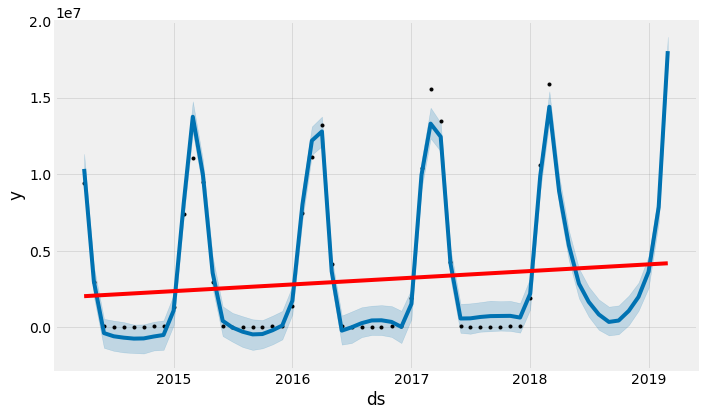

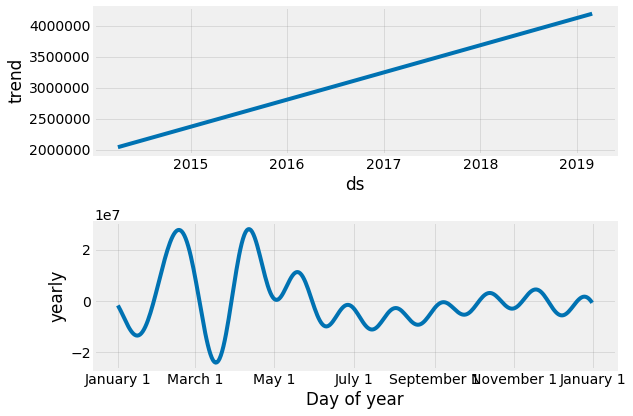

In [211]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=False,daily_seasonality=False)
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2018-03-01')])
future = prophet.make_future_dataframe(periods=12, freq= 'M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [212]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,2.040176e+06,9.449235e+06,1.133497e+07,2.040176e+06,2.040176e+06,8.315791e+06,8.315791e+06,8.315791e+06,8.315791e+06,8.315791e+06,8.315791e+06,0.0,0.0,0.0,1.035597e+07
1,2014-05-01,2.076087e+06,1.985724e+06,3.950464e+06,2.076087e+06,2.076087e+06,9.168421e+05,9.168421e+05,9.168421e+05,9.168421e+05,9.168421e+05,9.168421e+05,0.0,0.0,0.0,2.992929e+06
2,2014-06-01,2.113194e+06,-1.335546e+06,5.621377e+05,2.113194e+06,2.113194e+06,-2.485065e+06,-2.485065e+06,-2.485065e+06,-2.485065e+06,-2.485065e+06,-2.485065e+06,0.0,0.0,0.0,-3.718702e+05
3,2014-07-01,2.149105e+06,-1.529274e+06,4.395674e+05,2.149105e+06,2.149105e+06,-2.729206e+06,-2.729206e+06,-2.729206e+06,-2.729206e+06,-2.729206e+06,-2.729206e+06,0.0,0.0,0.0,-5.801006e+05
4,2014-08-01,2.186212e+06,-1.633390e+06,3.448544e+05,2.186212e+06,2.186212e+06,-2.857299e+06,-2.857299e+06,-2.857299e+06,-2.857299e+06,-2.857299e+06,-2.857299e+06,0.0,0.0,0.0,-6.710865e+05
5,2014-09-01,2.223320e+06,-1.673065e+06,1.816114e+05,2.223320e+06,2.223320e+06,-2.955693e+06,-2.955693e+06,-2.955693e+06,-2.955693e+06,-2.955693e+06,-2.955693e+06,0.0,0.0,0.0,-7.323731e+05
6,2014-10-01,2.259231e+06,-1.703215e+06,1.967224e+05,2.259231e+06,2.259231e+06,-2.979275e+06,-2.979275e+06,-2.979275e+06,-2.979275e+06,-2.979275e+06,-2.979275e+06,0.0,0.0,0.0,-7.200445e+05
7,2014-11-01,2.296338e+06,-1.505610e+06,3.659324e+05,2.296338e+06,2.296338e+06,-2.891021e+06,-2.891021e+06,-2.891021e+06,-2.891021e+06,-2.891021e+06,-2.891021e+06,0.0,0.0,0.0,-5.946825e+05
8,2014-12-01,2.332249e+06,-1.465797e+06,4.555466e+05,2.332249e+06,2.332249e+06,-2.827327e+06,-2.827327e+06,-2.827327e+06,-2.827327e+06,-2.827327e+06,-2.827327e+06,0.0,0.0,0.0,-4.950783e+05
9,2015-01-01,2.369356e+06,1.374034e+05,2.137336e+06,2.369356e+06,2.369356e+06,-1.273471e+06,-1.273471e+06,-1.273471e+06,-1.273471e+06,-1.273471e+06,-1.273471e+06,0.0,0.0,0.0,1.095885e+06


In [213]:
rmse = mean_squared_error(test['sales'],forecast.tail(15)['yhat'])
print(rmse)

3687559184073.8716


In [214]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,6.557724e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",7.794320e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",6.666789e+06,inf
"Alpha=0.6,Beta=0.8,DoubleExponentialSmoothing",6.625123e+06,inf
"Alpha=0.0403,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",2.228528e+06,inf
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",1.733336e+06,inf
"ARIMA(2,1,1)",inf,inf
"SARIMA(0,1,0)(3,1,0)6",6.393369e+15,inf
"SARIMA(0,1,0)(0,1,2)12",3.989412e+12,inf
Prophet,3.687559e+12,NaN


In [215]:
import fbprophet

In [216]:
m = fbprophet.Prophet()

In [217]:
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [218]:
future = m.make_future_dataframe(periods=365)

In [219]:
forecast = m.predict(future)

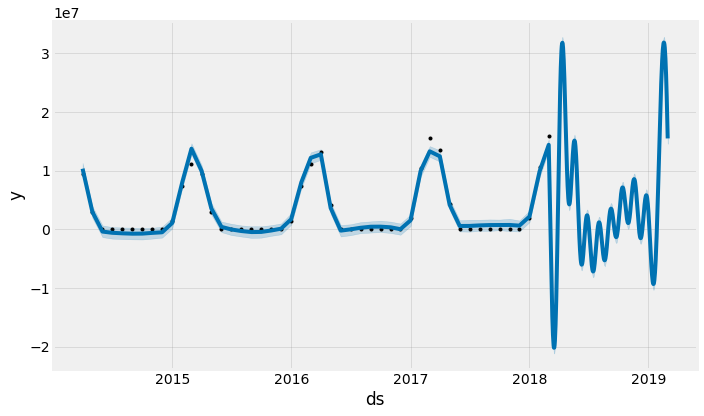

In [220]:
m.plot(forecast);

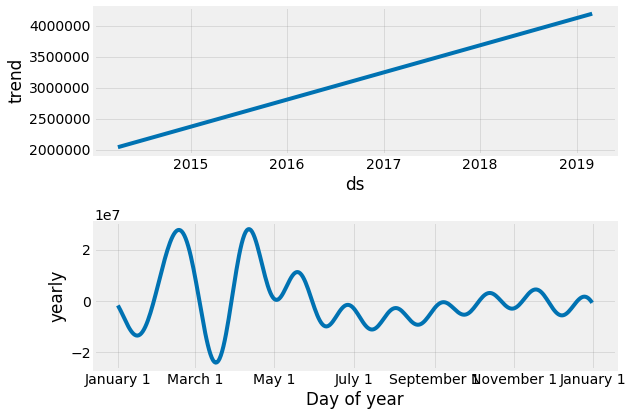

In [221]:
m.plot_components(forecast);

In [222]:
df_prophet.head()

,ds,y
Date,,
2014-04-01,2014-04-01,9404582
2014-05-01,2014-05-01,2966694
2014-06-01,2014-06-01,86222
2014-07-01,2014-07-01,0
2014-08-01,2014-08-01,0


In [223]:
future.tail()

,ds
408,2019-02-25
409,2019-02-26
410,2019-02-27
411,2019-02-28
412,2019-03-01


In [224]:
predict=m.predict(future)

In [225]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,2.040176e+06,9.395574e+06,1.131647e+07,2.040176e+06,2.040176e+06,8.315791e+06,8.315791e+06,8.315791e+06,8.315791e+06,8.315791e+06,8.315791e+06,0.0,0.0,0.0,1.035597e+07
1,2014-05-01,2.076087e+06,1.984157e+06,3.927977e+06,2.076087e+06,2.076087e+06,9.168421e+05,9.168421e+05,9.168421e+05,9.168421e+05,9.168421e+05,9.168421e+05,0.0,0.0,0.0,2.992929e+06
2,2014-06-01,2.113194e+06,-1.421201e+06,6.557535e+05,2.113194e+06,2.113194e+06,-2.485065e+06,-2.485065e+06,-2.485065e+06,-2.485065e+06,-2.485065e+06,-2.485065e+06,0.0,0.0,0.0,-3.718702e+05
3,2014-07-01,2.149105e+06,-1.583947e+06,4.534693e+05,2.149105e+06,2.149105e+06,-2.729206e+06,-2.729206e+06,-2.729206e+06,-2.729206e+06,-2.729206e+06,-2.729206e+06,0.0,0.0,0.0,-5.801006e+05
4,2014-08-01,2.186212e+06,-1.601590e+06,3.165728e+05,2.186212e+06,2.186212e+06,-2.857299e+06,-2.857299e+06,-2.857299e+06,-2.857299e+06,-2.857299e+06,-2.857299e+06,0.0,0.0,0.0,-6.710865e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2019-02-25,4.186568e+06,2.357304e+07,2.549622e+07,4.186486e+06,4.186657e+06,2.041364e+07,2.041364e+07,2.041364e+07,2.041364e+07,2.041364e+07,2.041364e+07,0.0,0.0,0.0,2.460021e+07
409,2019-02-26,4.187767e+06,2.162478e+07,2.360866e+07,4.187685e+06,4.187857e+06,1.842917e+07,1.842917e+07,1.842917e+07,1.842917e+07,1.842917e+07,1.842917e+07,0.0,0.0,0.0,2.261693e+07
410,2019-02-27,4.188966e+06,1.948719e+07,2.140187e+07,4.188884e+06,4.189057e+06,1.623892e+07,1.623892e+07,1.623892e+07,1.623892e+07,1.623892e+07,1.623892e+07,0.0,0.0,0.0,2.042789e+07
411,2019-02-28,4.190166e+06,1.703322e+07,1.902877e+07,4.190083e+06,4.190256e+06,1.386224e+07,1.386224e+07,1.386224e+07,1.386224e+07,1.386224e+07,1.386224e+07,0.0,0.0,0.0,1.805240e+07


In [226]:
predict[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-04-01,1.035597e+07,9.395574e+06,1.131647e+07
1,2014-05-01,2.992929e+06,1.984157e+06,3.927977e+06
2,2014-06-01,-3.718702e+05,-1.421201e+06,6.557535e+05
3,2014-07-01,-5.801006e+05,-1.583947e+06,4.534693e+05
4,2014-08-01,-6.710865e+05,-1.601590e+06,3.165728e+05


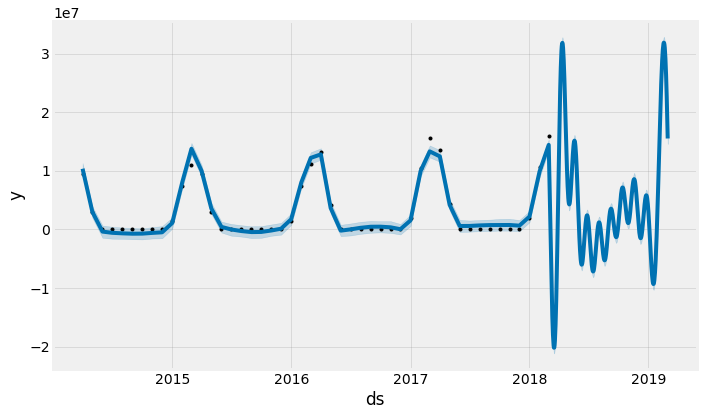

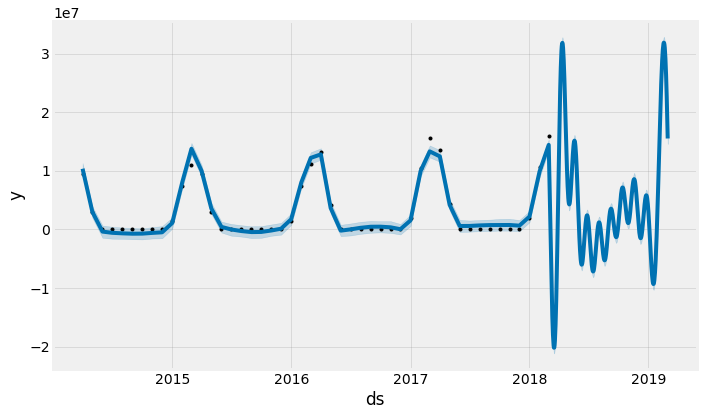

In [227]:
m.plot(predict)

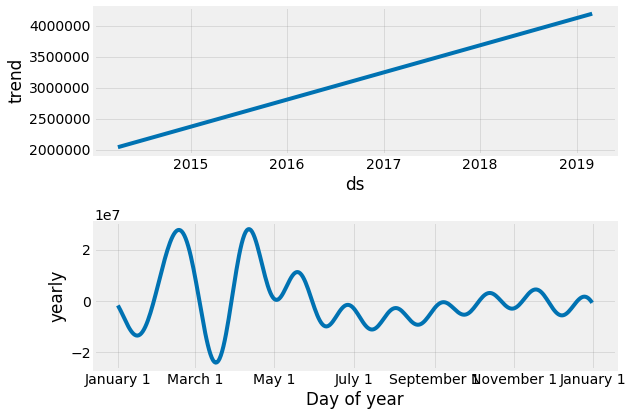

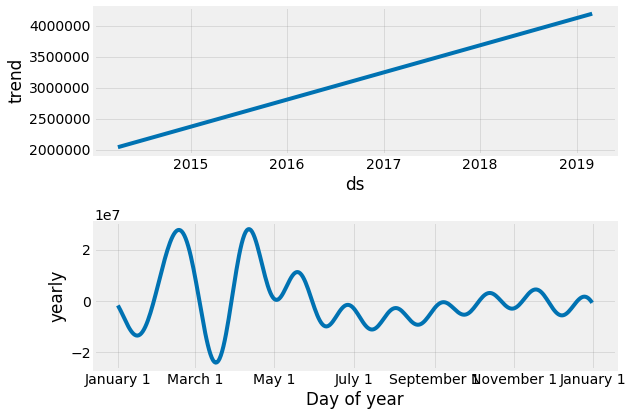

In [228]:
m.plot_components(predict)

In [229]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2016-09-02 00:00:00 and 2017-03-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [230]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-01,1.559350e+06,1.229380e+06,1.890182e+06,17959,2016-09-02
1,2016-11-01,1.617806e+06,1.316347e+06,1.949477e+06,97544,2016-09-02
2,2016-12-01,1.203262e+06,8.800456e+05,1.548901e+06,90047,2016-09-02
3,2017-01-01,1.740897e+06,1.379742e+06,2.035546e+06,1908340,2016-09-02
4,2017-02-01,6.520897e+06,6.201820e+06,6.840723e+06,10437161,2016-09-02


In [231]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,31 days,1.960943e+12,1.400337e+06,1.392387e+06,42.960253,0.0
1,60 days,1.928598e+12,1.388740e+06,1.381822e+06,7.838780,0.0
2,61 days,1.165010e+12,1.079356e+06,8.287309e+05,7.808818,0.5
3,90 days,6.290356e+11,7.931176e+05,6.252074e+05,6.197418,0.5
4,92 days,9.980341e+11,9.990165e+05,9.915847e+05,9.698029,0.5


model = ARIMA(Ban_Mix['sales'], order=(1,1,2))
try:
    model_fit = model.fit()
except:
    pass
output = model_fit.forecast(12)
yhat = output[0]
print(model_fit.summary())

In [232]:
fullmodel1 = ExponentialSmoothing(Che_Coo['sales'],
                                  trend='additive',
                                  seasonal='Additive').fit(smoothing_level=0.1,
                                                                 smoothing_slope=0.2,
                                                                 smoothing_seasonal=1.0)

In [233]:
RMSE_fullmodel1 = metrics.mean_squared_error(Che_Coo['sales'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 924910.3873672778


In [234]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=24)

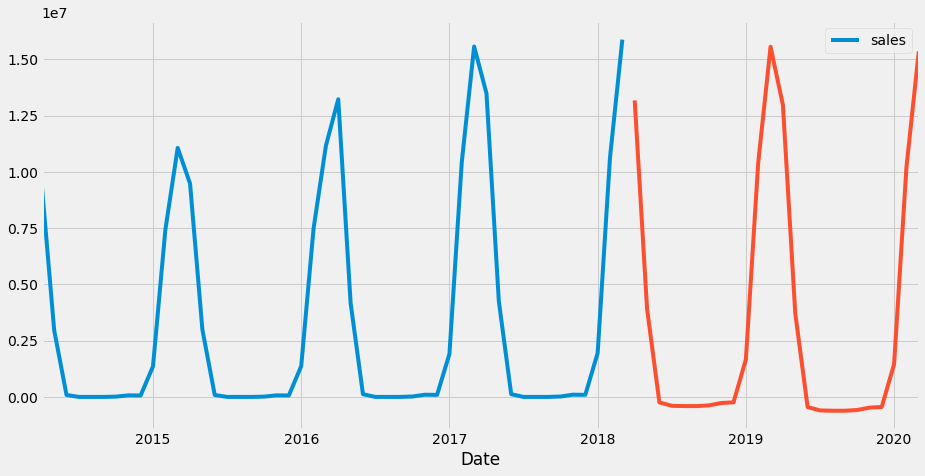

In [235]:
Che_Coo.plot()
prediction_1.plot();

In [236]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
2018-04-01,1.134813e+07,1.318004e+07,1.501195e+07
2018-05-01,2.089881e+06,3.921794e+06,5.753706e+06
2018-06-01,-2.076113e+06,-2.442004e+05,1.587712e+06
2018-07-01,-2.226175e+06,-3.942622e+05,1.437650e+06
2018-08-01,-2.239526e+06,-4.076136e+05,1.424299e+06


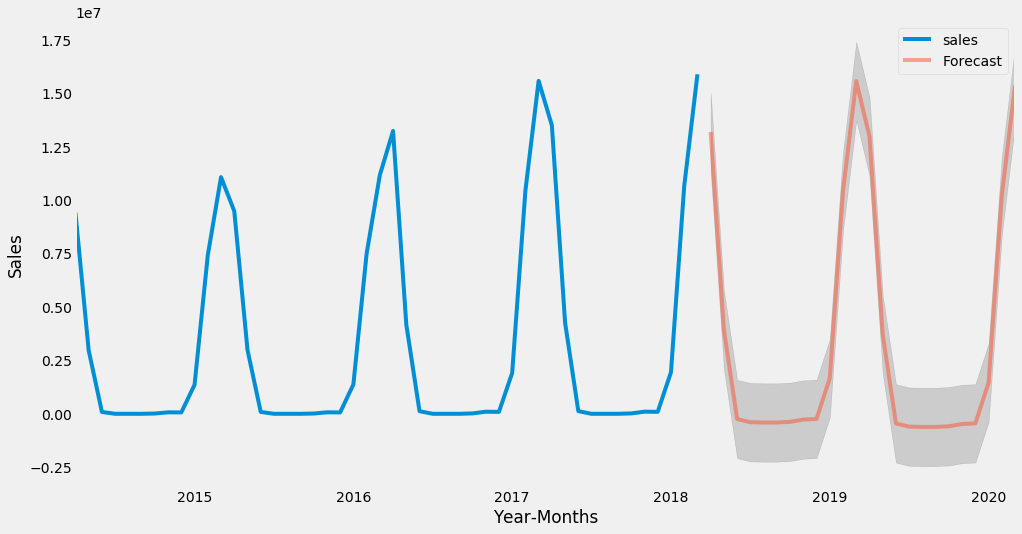

In [237]:
# plot the forecast along with the confidence band

axis = Che_Coo.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()